In [6]:
import numpy as np
import paperstyle as mystl
import matplotlib.pyplot as plt
import os 
import datetime

plt.rcParams.update(mystl.myStyle)
plt.rc('axes', unicode_minus=False)

def PlotRefFow(fin, fout=None):
    print("Plotting Reference Flow")
    _, ref_data = mystl.ReadFlowResults(fin)
    fig_size = mystl.GetFigSize(510, 4.0)
    fig , axs = plt.subplots(1,3, figsize=fig_size, dpi=100, constrained_layout=True)
    
    for iharm in range(3):
        ax = axs[iharm]
        
        two_name = f'v{iharm+2}_two_ref'
        four_name = f'v{iharm+2}_four_ref'
        truth_name = f'v{iharm+2}_ref_truth'
        two_label = mystl.GetLabel('r',iharm +2 , k = 2)
        four_label = mystl.GetLabel('r',iharm +2 , k = 4)
        t_label = mystl.GetLabel('r', iharm+ 2, sup=mystl.superscripts['truth'])


        y_m2, y_m2_err = ref_data[two_name], ref_data[f'{two_name}_err'] 
        y_m4 , y_m4_err = ref_data[four_name], ref_data[f'{four_name}_err']
        y_t = ref_data[truth_name]
        ax.errorbar(1.5, y_m4, yerr=y_m4_err, **mystl.diff_pythia_four_sty, label = four_label)
        ax.errorbar(0.5, y_m2, yerr=y_m2_err, **mystl.diff_pythia_two_sty, label = two_label)
        
        ax.plot([0,2], [y_t, y_t], **mystl.ref_truth_sty, label = t_label) 
        
        # turn off minor ticks
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', which='both', top=False)
        ax.set_ylim(ax.get_ylim()[0]*0.99, ax.get_ylim()[1]*1.01)
        ax.set_xlim(0,2)
        x_ticklabels = [ two_label, four_label]
        x_ticks = [0.5,1.5]
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticklabels, fontsize=10)
        yticks = [f'{y:.4f}' for y in ax.get_yticks()]
        ax.set_yticks(ax.get_yticks())
        ax.set_yticklabels(yticks, fontsize=8)

        px = 0.85
        py = 0.92
        ax.text(px,py,mystl.panel_labels[iharm], transform=ax.transAxes, weight='bold', fontsize=8)
        if iharm == 0:
            tx = 0.06
            ty = 0.92
            ax.text(tx,ty,'Reference Flow', transform=ax.transAxes, weight='bold', fontsize=8)
            ax.text(tx,ty-0.08, "PYTHIA+TennGen", transform=ax.transAxes, fontsize=8)
            ax.text(tx,ty-0.16,r'$Au+Au$ $\sqrt{s_{NN}}$ = 200 GeV', transform=ax.transAxes, fontsize=8)
            ax.text(tx,ty-0.24,r'20-30% Central', transform=ax.transAxes, fontsize=8)

    if fout is not None:
        plt.savefig(fout)
        plt.close()
    else:
        plt.show()
    return

def PlotDiffFlow(fin, uiter, fout = None , cuts = {'xmin': None, 'xmax': None, 'ymin': None, 'ymax': None}):
    print("Plotting Differential Flow")
    th1ds, _ = mystl.ReadFlowResults(fin)

    fig_size = mystl.GetFigSize(510, 3.6)
    fig , axs = plt.subplots(1,3, figsize=fig_size, dpi=500, constrained_layout=True)

    xmin = cuts['xmin']
    xmax = cuts['xmax']
    ymin = cuts['ymin']
    ymax = cuts['ymax']


    for iharm in range(3):

        ax = axs[iharm]

        two_meas = f'h1_v{iharm+2}_two_diff_meas'
        four_meas = f'h1_v{iharm+2}_four_diff_meas'
        two_unfolded =  f'h1_v{iharm+2}_two_diff_unfolded_{uiter}'
        four_unfolded =  f'h1_v{iharm+2}_four_diff_unfolded_{uiter}'
        two_pythia = f'h1_v{iharm+2}_two_diff_truth'
        four_pythia = f'h1_v{iharm+2}_four_diff_truth'
        truth_name = f'h1_jet_v{iharm+2}_func'


        x_t, y_t, _ , _ = mystl.GetPlot(th1ds[truth_name], xmin, xmax, ymin, ymax)
        y_t/=12
        # print(y_t)
        max_y_t = np.max(y_t)
        mean_y_t = np.mean(y_t)
        min_y_t = np.min(y_t)

        # # # std_y_t = np.std(y_t)
        # abs_diff = np.abs(max_y_t - mean_y_t)
        # if np.abs(min_y_t - mean_y_t) > abs_diff:
        #     abs_diff = np.abs(min_y_t - mean_y_t)
        
        # if abs_diff/mean_y_t < 0.1:
        #     abs_diff = mean_y_t
        # xlow = mean_y_t - abs_diff
        # xhigh = mean_y_t + 2.0*abs_diff

        # ymin

        # x_2m, y_2m, _, y_2m_err = mystl.GetPlot(th1ds[two_meas], xmin, xmax, ymin, ymax)
        # x_4m, y_4m, _, y_4m_err = mystl.GetPlot(th1ds[four_meas],  xmin, xmax, ymin, ymax)
        x_2u, y_2u, _, y_2u_err = mystl.GetPlot(th1ds[two_unfolded] , xmin, xmax, ymin, ymax)
        # y_2u_err= y_2u_err/np.sqrt(10)
        x_4u, y_4u, _, y_4u_err = mystl.GetPlot(th1ds[four_unfolded] , xmin, xmax, ymin, ymax)
        # y_4u_err = y_4u_err/np.sqrt(10)

        # x_2p, y_2p, _, y_2p_err = mystl.GetPlot(th1ds[two_pythia], xmin, xmax, ymin, ymax)
        # x_4p, y_4p, _, y_4p_err = mystl.GetPlot(th1ds[four_pythia] , xmin, xmax, ymin, ymax)
        

        # y_2u_err = y_2u_err/np.sqrt(20)
        # y_4u_err = y_4u_err/np.sqrt(20)
        # ax.errorbar(x_2m, y_2m, yerr=y_2m_err, **mystl.diff_meas_two_sty, label = mystl.GetLabel("d", iharm+2, k=2, sup = mystl.superscripts['meas']))
        # ax.errorbar(x_4m, y_4m, yerr=y_4m_err, **mystl.diff_meas_four_sty, label =  mystl.GetLabel("d", iharm+2, k=4, sup = mystl.superscripts['meas']))
        x_2u = x_2u + 0.5 # shift the x values for the unfolded data

        ax.errorbar(x_2u, y_2u, yerr=y_2u_err, **mystl.diff_pythia_two_sty, label =  mystl.GetLabel("d", iharm+2, k=2, sup = mystl.superscripts['unfold']))
        ax.errorbar(x_4u, y_4u, yerr=y_4u_err, **mystl.diff_pythia_four_sty, label = mystl.GetLabel("d", iharm+2, k=4, sup = mystl.superscripts['unfold']))
       
        # ax.errorbar(x_2p, y_2p, yerr=y_2p_err, **mystl.diff_pythia_two_sty, label = mystl.GetLabel("d", iharm+2, k=2, sup = mystl.superscripts['pythia']))
        # ax.errorbar(x_4p, y_4p, yerr=y_4p_err, **mystl.diff_pythia_four_sty, label = mystl.GetLabel("d", iharm+2, k=4, sup = mystl.superscripts['pythia']))
        ax.plot(x_t, y_t, **mystl.diff_truth_sty, label = mystl.GetLabel("d", iharm+2, sup = mystl.superscripts['truth']))

       
        # ax.set_ylim(xlow, xhigh)
        ax.set_xlabel(mystl.GetpTaxisLabel(), loc='right', fontsize=10)
        if iharm == 1:
   
            ax.legend(loc='upper left', fontsize=10, frameon=False, ncol=1)
        px = 0.85
        py = 0.1
        ax.text(px,py,mystl.panel_labels[iharm], transform=ax.transAxes, weight='bold')
        ax.set_ylabel(mystl.GetYaxisLabel('d', iharm+2), loc='top', fontsize=10)
        if iharm == 0:
            
            tx = 0.06
            ty = 0.85
            # axs.set_xlim(0, 0.2)
            # ax.text(tx,ty,'Differential Flow', transform=ax.transAxes, weight='bold', fontsize=10)
            ax.text(tx,ty, "PYTHIA+TennGen", transform=ax.transAxes, fontsize=10)
            ax.text(tx,ty-0.08,r'$Au+Au$ $\sqrt{s_{NN}}$ = 200 GeV', transform=ax.transAxes, fontsize=10)
            ax.text(tx,ty-0.16,r'20-30% Central', transform=ax.transAxes, fontsize=10)
            # ax.legend(loc='lower left', fontsize=10, frameon=False, ncol=3)

    if fout is not None:
        plt.savefig(fout)
        plt.close()

    else:
        plt.show()
    return

def PlotDiffMeasFlow(fin, iharm, fout = None,  cuts = {'xmin': None, 'xmax': None, 'ymin': None, 'ymax': None}):

    print("Plotting Differential Measured Flow")
    th1ds, _ = mystl.ReadFlowResults(fin)

    fig_size = mystl.GetFigSize(247, 3.5)
    fig = plt.figure(figsize=fig_size, dpi=200, constrained_layout=True)
    ax = fig.add_subplot(111)

    two_meas = f'h1_v{iharm}_two_diff_meas'
    four_meas = f'h1_v{iharm}_four_diff_meas'
    two_pythia = f'h1_v{iharm}_two_diff_truth'
    four_pythia = f'h1_v{iharm}_four_diff_truth'
    truth_name = f'h1_jet_v{iharm}_func'
    
    
    xmin = cuts['xmin']
    xmax = cuts['xmax']
    ymin = cuts['ymin']
    ymax = cuts['ymax']

    # two_meas_lab = mystl.GetLabel("d", iharm+2, k=2, sup = mystl.superscripts['meas'])
    # four_meas_lab = mystl.GetLabel("d", iharm+2, k=4, sup = mystl.superscripts['meas'])
    # two_pythia_lab = mystl.GetLabel("d", iharm+2, k=2, sup = mystl.superscripts['pythia'])
    # four_pythia_lab =mystl.GetLabel("d", iharm+2, k=4, sup = mystl.superscripts['pythia'])
    # truth_lab = mystl.GetLabel("d", iharm+2, sup = mystl.superscripts['truth'])


    x_2m, y_2m, _, y_2m_err = mystl.GetPlot(th1ds[two_meas], xmin, xmax, ymin, ymax)
    x_4m, y_4m, _, y_4m_err = mystl.GetPlot(th1ds[four_meas], xmin, xmax, ymin, ymax)
    x_2p, y_2p, _, y_2p_err = mystl.GetPlot(th1ds[two_pythia], xmin, xmax, ymin, ymax)
    x_4p, y_4p, _, y_4p_err = mystl.GetPlot(th1ds[four_pythia], xmin, xmax, ymin, ymax)
    x_t, y_t, _ , _ = mystl.GetPlot(th1ds[truth_name], xmin, xmax, ymin, ymax)


    ax.errorbar(x_2m, y_2m, yerr=y_2m_err, **mystl.diff_meas_two_sty, label = mystl.GetLabel("d", iharm, k=2, sup = mystl.superscripts['meas']))
    ax.errorbar(x_4m, y_4m, yerr=y_4m_err, **mystl.diff_meas_four_sty, label = mystl.GetLabel("d", iharm, k=4, sup = mystl.superscripts['meas']))
    ax.errorbar(x_2p, y_2p, yerr=y_2p_err, **mystl.diff_pythia_two_sty, label = mystl.GetLabel("d", iharm, k=2, sup = mystl.superscripts['pythia']))
    ax.errorbar(x_4p, y_4p, yerr=y_4p_err, **mystl.diff_pythia_four_sty, label = mystl.GetLabel("d", iharm, k=4, sup = mystl.superscripts['pythia']))
    ax.plot(x_t, y_t, **mystl.diff_truth_sty, label = mystl.GetLabel("d", iharm, sup = mystl.superscripts['truth']))
    

    px = 0.05
    py = 0.05
    ax.text(px,py,f"Measured $v_{iharm}$", transform=ax.transAxes, weight='bold', fontsize=8)

    ax.legend(loc='lower left', fontsize=8, frameon=False, ncol=2)

    ax.set_ylabel(mystl.GetYaxisLabel('d', iharm), loc='center')
    ax.set_xlabel(mystl.GetpTaxisLabel(), loc='center')

    if fout is not None:
        plt.savefig(fout)
        plt.close()
    else:
        plt.show()

    return

def PlotDiffUnfoldFlow(fin, iharm, fout = None,  cuts = {'xmin': None, 'xmax': None, 'ymin': None, 'ymax': None}):

    print("Plotting Differential Unfolded Flow")
    th1ds, _ = mystl.ReadFlowResults(fin)

    fig_size = mystl.GetFigSize(247, 1.5)
    fig = plt.figure(figsize=fig_size, dpi=200, constrained_layout=True)
    ax = fig.add_subplot(111)

    uindices = mystl.GetUnfoldedIndices(th1ds)    
    truth_name = f'h1_jet_v{iharm}_func'
    
    
    xmin = cuts['xmin']
    xmax = cuts['xmax']
    ymin = cuts['ymin']
    ymax = cuts['ymax']
    
   
    
    for u in uindices:
   
        x_t, y_t, _ , _ = mystl.GetPlot(th1ds[truth_name], xmin, xmax, ymin, ymax)
        u_two = f'h1_v{iharm}_two_diff_unfolded_{u}'
        x_2m, y_2m, _, y_2m_err = mystl.GetPlot(th1ds[u_two], xmin, xmax, ymin, ymax)
        x_2t, y_2t, _, y_2t_err = mystl.GetPlot(th1ds[f'h1_v{iharm}_two_diff_truth'], xmin, xmax, ymin, ymax)
        
        u_four = f'h1_v{iharm}_four_diff_unfolded_{u}'
        x_4m, y_4m, _, y_4m_err = mystl.GetPlot(th1ds[u_four], xmin, xmax, ymin, ymax)
        x_4t, y_4t, _, y_4t_err = mystl.GetPlot(th1ds[f'h1_v{iharm}_four_diff_truth'], xmin, xmax, ymin, ymax)

        # make y_t have same number of bins as y_m
        # y_t = np.interp(x_2m, x_t, y_t)
        # #  = np.interp(x_2m, x_t,)
        y_t_prime = []
        for i in range(len(x_2m)):
            # get the index of the closest value in x_t
            idx = np.abs(x_t - x_2m[i]).argmin()
            y_t_prime.append(y_t[idx])
        y_t = np.array(y_t_prime)
        # y_t = y_t/y_t[0]
        
        y_2m = y_2m/y_t
        y_2m_err = y_2m_err/y_t

        y_4m = y_4m/y_t
        y_4m_err = y_4m_err/y_t


        # y_2m = y_2m/y_2t
        # y_2m_err = y_2m_err/y_2t
        # y_4m = y_4m/y_4t
        # y_4m_err = y_4m_err/y_4t
        ax.errorbar(x_2m, y_2m, yerr=y_2m_err, label = mystl.GetLabel("d", iharm, k=2, sup = f"iter {u}"))
        ax.errorbar(x_4m, y_4m, yerr=y_4m_err, label = mystl.GetLabel("d", iharm, k=4, sup = f"iter {u}"))


    # x_t, y_t, _ , _ = mystl.GetPlot(th1ds[truth_name], xmin, xmax, ymin, ymax)
    # ax.plot(x_t, y_t, **mystl.diff_truth_sty, label = mystl.GetLabel("d", iharm, sup = mystl.superscripts['truth']))
    ax.plot([xmin, xmax], [1,1], **mystl.diff_truth_sty, label = mystl.GetLabel("d", iharm, sup = mystl.superscripts['truth']))

    ax.set_ylabel(mystl.GetYaxisLabel('d', iharm), loc='center')
    ax.set_xlabel(mystl.GetpTaxisLabel(), loc='center')
    px = 0.05
    py = 0.05
    ax.text(px,py,f"Unfolded $v_{iharm}$", transform=ax.transAxes, weight='bold', fontsize=8)

    ax.legend(loc='lower left', fontsize=8, frameon=False, ncol=4)

    

    if fout is not None:
        plt.savefig(fout)
        plt.close()
    
    else:
        plt.show()
    return


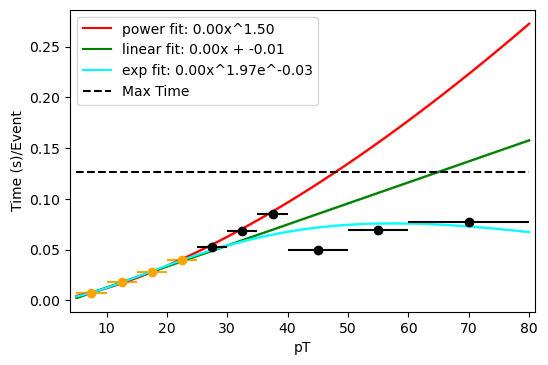

In [36]:
import numpy as np
time = [759.5858974358974, 1755.0847058823526, 2792.6731958762884, 3968.011702127659]
sigmas= [5.878682138182699, 9.53445153587585, 61.332074848730585, 29.08472530451217]
ptranges= [5,10,15,20,25]
sigmas= np.array(sigmas)
time = np.array(time)
#multiply time by bin width
# time = time*np.diff(ptranges)
nevents = 100000
time = time/nevents
sigmas = sigmas/nevents

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a*x + b

def power_func(x, a, b):
    return a*x**b

def exp_func(x, a, b, c):
    return a*x**b*np.exp(c*x)

x_centers = np.array(ptranges[:-1]) + np.diff(ptranges)/2
x_err = np.diff(ptranges)/2
fig, ax = plt.subplots( figsize=(6,4), dpi=100)

ax.errorbar(x_centers, time, yerr=sigmas, xerr=x_err, fmt='o', color='orange')
popt, pcov = curve_fit(power_func, x_centers, time, sigma=sigmas)
x = np.linspace(5, 80, 100)
y = power_func(x, *popt)
ax.plot(x, y, label = f'power fit: {popt[0]:.2f}x^{popt[1]:.2f}', color='red')
ax.fill_between(x, y-np.sqrt(np.diag(pcov)[0]), y+np.sqrt(np.diag(pcov)[0]), color='red', alpha=0.5)

popt, pcov = curve_fit(linear_func, x_centers, time, sigma=sigmas)
y = linear_func(x, *popt)
ax.plot(x, y, label = f'linear fit: {popt[0]:.2f}x + {popt[1]:.2f}', color='green')
ax.fill_between(x, y-np.sqrt(np.diag(pcov)[0]), y+np.sqrt(np.diag(pcov)[0]), color='green', alpha=0.5)

popt, pcov = curve_fit(exp_func, x_centers, time, sigma=sigmas)
y = exp_func(x, *popt)
ax.plot(x, y, label = f'exp fit: {popt[0]:.2f}x^{popt[1]:.2f}e^{popt[2]:.2f}', color='cyan')
ax.fill_between(x, y-np.sqrt(np.diag(pcov)[0]), y+np.sqrt(np.diag(pcov)[0]), color='cyan', alpha=0.5)

x_new_points = [25,30,35,40,50,60,80]
x_new_centers = np.array(x_new_points[:-1]) + np.diff(x_new_points)/2
time_new =[5254.984536082474,6871.769387755101,8471.537755102041,4950.366326530612,6948.150526315788,7759.202000000002]
sigmas_new = [107.9093828891002,83.17089292677694,131.94125046607775,65.54531372883757,106.60971899378363, 276.1562021682656]
time_new = np.array(time_new)
# time_new = time_new*np.diff(x_new_points)
time_new = time_new/nevents
sigmas_new = np.array(sigmas_new)
sigmas_new = sigmas_new/nevents

ax.errorbar(x_new_centers, time_new, yerr=sigmas_new, xerr=np.diff(x_new_points)/2, fmt='o', color='black')



max_time = [(3.5*3600)/100000]
ax.plot([5,80], [max_time[0], max_time[0]], label='Max Time', color='black', linestyle='--')

ax.legend()
# ax.set_yscale('log')
ax.set_xlim(4,81)
ax.set_xlabel('pT')
ax.set_ylabel('Time (s)/Event')
plt.show()

In [6]:
proj=(3600+(19*60)+18)/0.6


[3 4 5 6]
Plotting Differential Flow


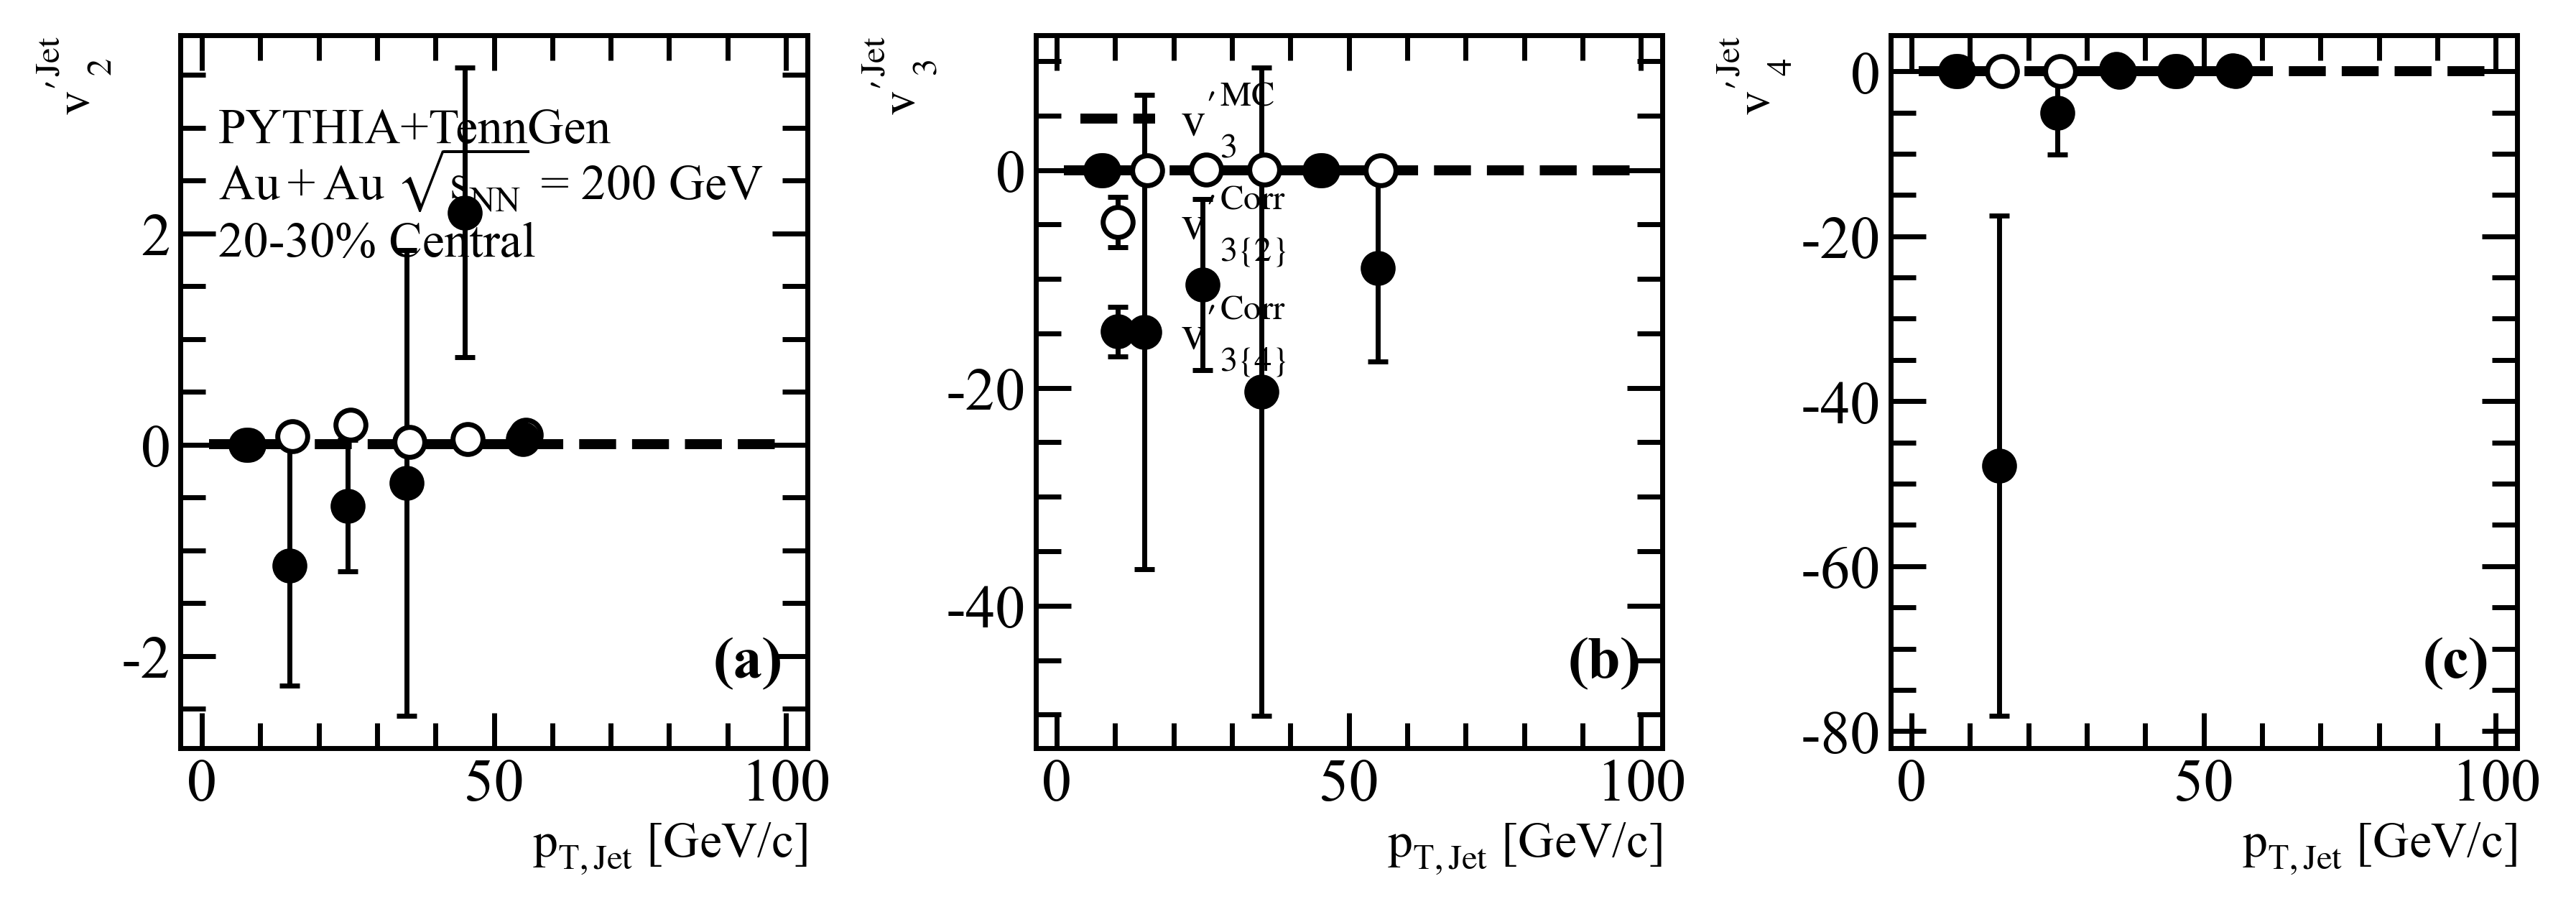

In [10]:
# path = '/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/result_May_14_2024_5toInfGeV_10MillJets_SmallerPtBins_CentralValues'
# path ='/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/result_May_14_2024_5toInfGeV_10MillJets_100UnfoldingBins_Max9Iter_DiffTruthBinning'
# path = '/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/result_May_14_2024_5toInfGeV_10MillJets_PtSpec_Unfolding'
# path = '/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/result_May_14_2024_5toInfGeV_10MillJets_addWeights' ## best one
# path = '/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/result_May_15_2024_5to30toInfGeV_30MillJetEvents'
# path='/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/results_may18_50mill'
# path = '/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/result_May_14_2024_5toInfGeV_10MillJets_SmallerPtBins_NoMAD'
# path = '/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/result_May_14_2024_5toInfGeV_10MillJets_SmallerPtBins_NoMAD'
# rotations = ['ConstantA', 'ConstantB','ConstantC', 'Cosine','Linear','Logarithmic']
# rotations = ['ConstantBLarge']
path="/lustre/isaac/scratch/tmengel/JetVnCumulantMethod/rootfiles/anafiles/2vn_0"
# for rot in rotations:
filename = f'{path}/flow_results.root'
cuts = {'xmin': 0, 'xmax': 100, 'ymin': None, 'ymax': None}
# cuts = {'xmin': None, 'xmax': None, 'ymin': None, 'ymax': None}
th1ds, _ = mystl.ReadFlowResults(filename)
uindices = mystl.GetUnfoldedIndices(th1ds)    
print(uindices)
# for uiter in uindices:
PlotDiffFlow(filename, 6, fout=None, cuts = cuts)

# PlotRefFow(filename, fout=None)
# PlotDiffUnfoldFlow(filename, 3, fout=None, cuts = cuts)


In [39]:
# get the current date 00_00_0000_0000 (day, month, 4 digit year, hour, minute)
now = datetime.datetime.now().strftime("%h_%d_%Y_%H%M")
output_dir = f"/lustre/isaac/scratch/tmengel/jet-vn-cumulant/plots/results_{now}/"
os.makedirs(output_dir, exist_ok=True)

files_dir ='/lustre/isaac/scratch/tmengel/jet-vn-cumulant/ana/rootfiles/'
rotations = ['ConstantA', 'ConstantB','ConstantC', 'Cosine','Linear','Logarithmic']

for rot in rotations:

    filename = f'{files_dir}/{rot}/flow_results.root'
    PlotRefFow(filename, f'{output_dir}/{rot}_ref_flow.png')
    
    no_cuts = {'xmin': 0, 'xmax': 60, 'ymin': None, 'ymax': None}
    th1ds, _ = mystl.ReadFlowResults(filename)
    uindices = mystl.GetUnfoldedIndices(th1ds)    
    for uiter in uindices:
        PlotDiffFlow(filename, uiter, f'{output_dir}/{rot}_diff_flow_iter{uiter}.png', no_cuts)
    
    for iharm in range(2,5):
        PlotDiffMeasFlow(filename, iharm, f'{output_dir}/{rot}_diff_meas_v{iharm}.png', no_cuts)
        PlotDiffUnfoldFlow(filename, iharm, f'{output_dir}/{rot}_diff_unfold_v{iharm}.png', no_cuts)
    
    xmin = 0
    xmax = 0
    ymin = 0
    ymax = 0
    for iharm in range(2,5):
        jet_func = f'h1_jet_v{iharm}_func'
        cuts = {'xmin': 0,
                'xmax': 60,
                'ymin': 0.5*np.min(th1ds[jet_func]['y']),
                'ymax': 1.5*np.max(th1ds[jet_func]['y'])}
        
        if cuts['xmin'] < xmin:
            xmin = cuts['xmin']
        if cuts['xmax'] > xmax:
            xmax = cuts['xmax']
        if cuts['ymin'] < ymin:
            ymin = cuts['ymin']
        if cuts['ymax'] > ymax:
            ymax = cuts['ymax']

        PlotDiffMeasFlow(filename, iharm, f'{output_dir}/{rot}_diff_meas_v{iharm}_zoomed.png', cuts)
        PlotDiffUnfoldFlow(filename, iharm, f'{output_dir}/{rot}_diff_unfold_v{iharm}_zoomed.png', cuts)

    all_cuts = {'xmin': xmin, 'xmax': xmax, 'ymin': ymin, 'ymax': ymax}
    for uiter in uindices:
        PlotDiffFlow(filename, uiter, f'{output_dir}/{rot}_diff_flow_iter{uiter}_zoomed.png', all_cuts)

    
    for iharm in range(2,5):
        PlotDiffMeasFlow(filename, iharm, f'{output_dir}/{rot}_diff_meas_v{iharm}.png')
        PlotDiffUnfoldFlow(filename, iharm, f'{output_dir}/{rot}_diff_unfold_v{iharm}.png')

    # cp files to plotting directory
    str_cmd = f'cp {filename} {output_dir}/{rot}_flow_results.root'

    os.system(str_cmd)
    print(f'Copied {filename} to {output_dir}/{rot}_flow_results.root')


Plotting Reference Flow


OSError: Failed to open file /lustre/isaac/scratch/tmengel/jet-vn-cumulant/ana/rootfiles//ConstantA/flow_results.root

Error in <TFile::TFile>: file /lustre/isaac/scratch/tmengel/jet-vn-cumulant/ana/rootfiles//ConstantA/flow_results.root does not exist
